In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

In [2]:
df = pd.read_csv("data.csv")

In [16]:
df = df.drop(['Unnamed: 0'],axis=1)

In [17]:
corr = df.drop(["Performance"],axis=1).corr()

In [18]:
features = df.columns.tolist()
target = "Performance"

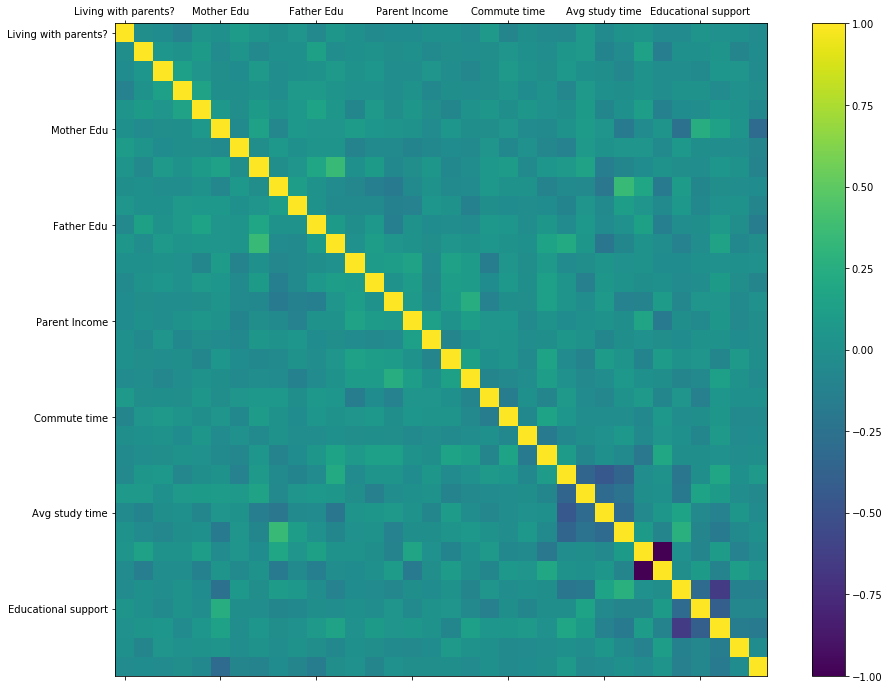

In [19]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(features)
ax.set_yticklabels(features)

plt.show()

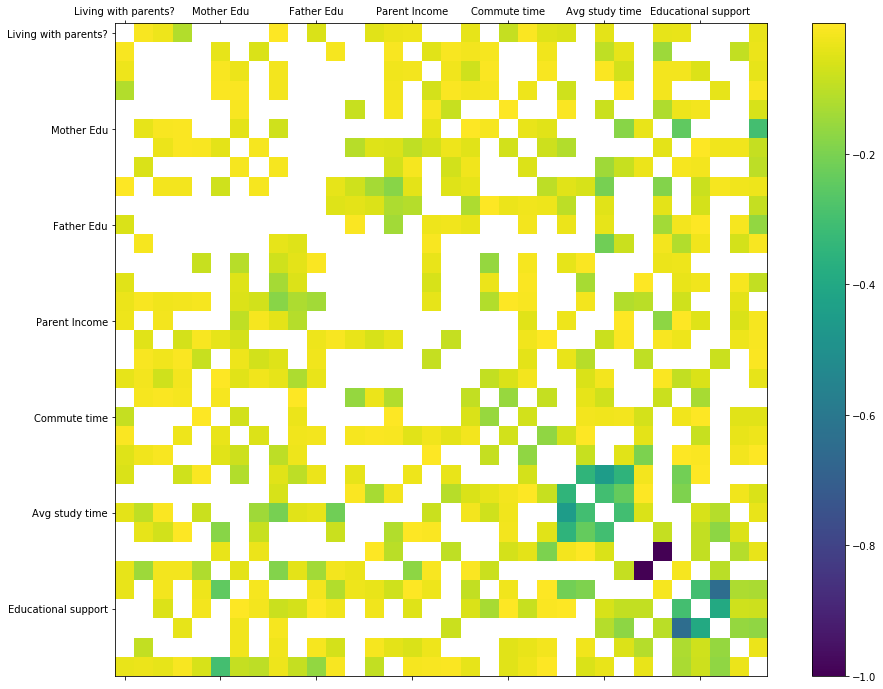

In [21]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr[corr<0], interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(features)
ax.set_yticklabels(features)

plt.show()

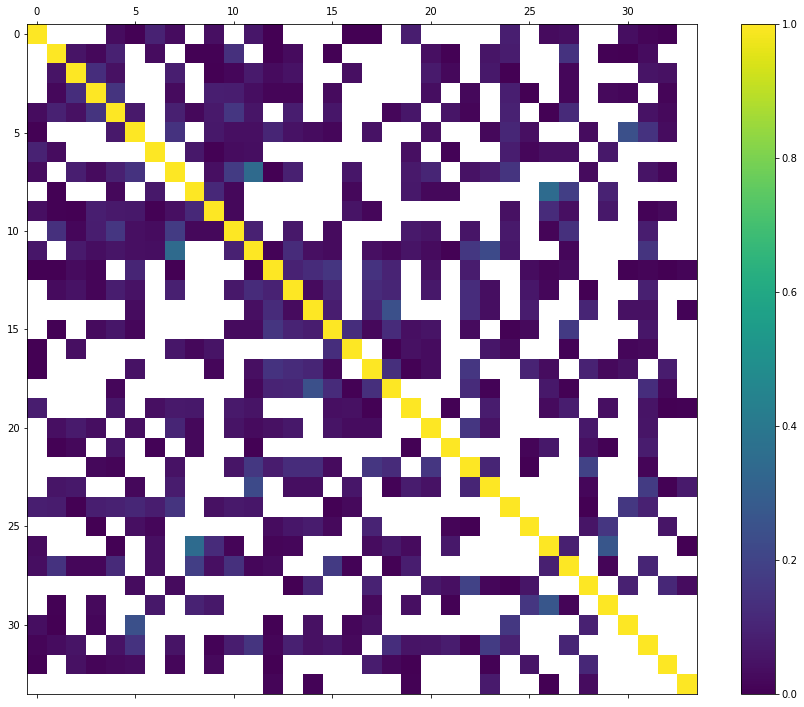

In [22]:
plt.figure(figsize=(16,12))
plt.matshow(corr[corr >0],fignum=1)
plt.colorbar()
plt.show()

In [28]:
imp_features = ['Avg leaves', 'Avg study time','Father Edu','Thinking','Perceiving','XI']

cov_imp = df[imp_features].cov()

In [31]:
print cov_imp

                Avg leaves  Avg study time  Father Edu  Thinking  Perceiving  \
Avg leaves        0.026749       -0.000975    0.000444 -0.000193    0.005750   
Avg study time   -0.000975        0.014390   -0.000141  0.000329   -0.002601   
Father Edu        0.000444       -0.000141    0.048284 -0.001479    0.001216   
Thinking         -0.000193        0.000329   -0.001479  0.060065   -0.011554   
Perceiving        0.005750       -0.002601    0.001216 -0.011554    0.078733   
XI                0.004374        0.001033    0.000357  0.001453    0.000230   

                      XI  
Avg leaves      0.004374  
Avg study time  0.001033  
Father Edu      0.000357  
Thinking        0.001453  
Perceiving      0.000230  
XI              0.201653  


# Clustering 

In [34]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test = train_test_split(df, test_size=0.2,random_state = 42)

In [36]:
clusters = ['IX','X','XI','XII']

In [37]:
y_train = X_train[clusters]
X_train = X_train.drop(clusters,axis=1)

In [38]:
y_test = X_test[clusters]
X_test = X_test.drop(clusters,axis=1)

In [39]:
#label encoding the one hot encoded variable
y_test = pd.DataFrame([pd.Series(y_test.loc[y_test.index[i]]).nonzero()[0][0] for i in range(len(y_test.index))])

y_train = pd.DataFrame([pd.Series(y_train.loc[y_train.index[i]]).nonzero()[0][0] for i in range(len(y_train.index))])

In [40]:
kmeans = KMeans(n_clusters=4,random_state=1).fit(X_train)

In [41]:
y_k = kmeans.predict(X_test)

In [42]:
kmeans.score(X_test,y_test)

-3433.4309618126681

In [43]:
spec = SpectralClustering(n_clusters=4, random_state=1).fit(X_train)

In [44]:
y_spec = spec.fit_predict(X_test)

In [45]:
agg = AgglomerativeClustering(n_clusters=4).fit(X_train)

In [46]:
y_agg = agg.fit_predict(X_test)

# Visualizing the reduced data in 3 dimensions


In [47]:
grade = df[clusters]

In [48]:
df_new = df.drop(clusters, axis=1)

In [49]:
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(df_new)

pcadf = pd.DataFrame(data = principal_comp, columns=['component_1', 'component_2','component_3'])



In [50]:
g = pd.DataFrame([pd.Series(grade.loc[grade.index[i]]).nonzero()[0][0] for i in range(len(grade.index))])

In [51]:
finaldf = pd.concat([pcadf, g],axis=1)

In [53]:
c = {1:finaldf[finaldf[0]==0],2:finaldf[finaldf[0]==1],3:finaldf[finaldf[0]==2],4:finaldf[finaldf[0]==3]}

In [58]:
colors = {1:'red',2:'blues',3:'green',4:'yellow'}

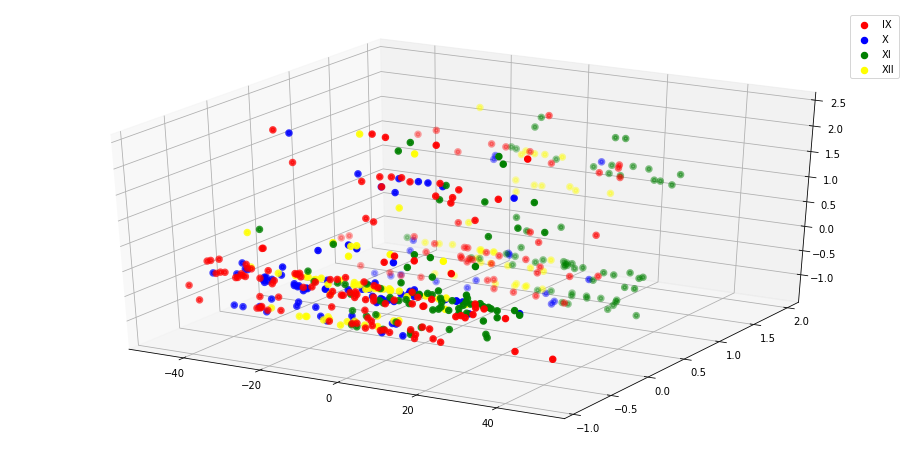

In [69]:

fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')


for key in c:
    ax.scatter(c[key]['component_1'],c[key]['component_2'],c[key]['component_3'], c=colors[key], linewidth=3)
    
ax.legend(['IX','X','XI','XII'])
plt.show()




# Clustering on the reduced data set

In [70]:
x_new = finaldf.drop(g,axis=1)

In [71]:
x_train,x_test, ytr, yts = train_test_split(x_new,g, test_size=0.2,random_state=42)

In [72]:
knew = KMeans(n_clusters=4,random_state=1).fit(x_train)

In [73]:
y_h = knew.predict(x_test)

In [78]:
knew.score(x_test,yts)

-3218.9160548268192

# Discretizing the marks and doing PCA on it

In [83]:
bins= [0,10,20,30,40,50,60,70,80,90,100]
labels = [1,2,3,4,5,6,7,8,9,10]
s =pd.cut(df.Performance, bins =bins,labels =labels)


df_bins = df.assign(Performance_bins = s.values)

In [86]:
df_bins = df_bins.drop(['Performance'],axis=1)

In [115]:
df_bins

,Family Size,Living with parents?,Mother Edu,Father Edu,Parent Income,Commute time,Avg study time,Educational support,Extra-curricular,Higher studies,...,XI,XII,Female,Male,Other means of travel,Travel by Bus,Travel by auto-rikshaw,Travel by car,Travel by walk,Performance_bins
0,0.3,1,0.121212,0.8,0.6,0.8,0.2,1,0.2,1,...,0,0,1,0,0,0,1,0,0,5
1,0.7,1,0.030303,0.2,0.6,0.8,0.6,1,0.8,1,...,0,0,1,0,1,0,0,0,0,10
2,0.6,1,0.030303,0.4,0.4,0.6,0.6,1,0.2,-1,...,0,0,1,0,0,0,1,0,0,4
3,0.4,1,0.121212,0.8,0.4,0.6,0.2,-1,0.2,1,...,0,0,1,0,0,0,1,0,0,8
4,0.7,1,0.060606,0.6,0.4,0.4,0.6,-1,0.2,1,...,0,0,1,0,0,0,1,0,0,9


In [89]:
per_bins = df_bins['Performance_bins']

df1 = df_bins.drop(['Performance_bins'],axis=1)

In [90]:
# 3 dimensional PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(df_new)

pca_new = pd.DataFrame(data = principal_comp, columns=['component_1', 'component_2','component_3'])

In [92]:
final = pd.concat([pca_new,per_bins],axis=1)

In [99]:
classes = {1:final[final['Performance_bins']==1],2:final[final['Performance_bins']==2],3:final[final['Performance_bins']==3],4:final[final['Performance_bins']==4],
          5:final[final['Performance_bins']==5], 6:final[final['Performance_bins']==6], 7:final[final['Performance_bins']==7],8:final[final['Performance_bins']==8],9:final[final['Performance_bins']==9],10:final[final['Performance_bins']==10]}

In [107]:
color_classes = {1:'red',2:'blue',3:'green',4:'yellow',5:'brown',6:'black',7:'purple',8:'orange',9:'pink',10:'magenta'}

<IPython.core.display.Javascript object>


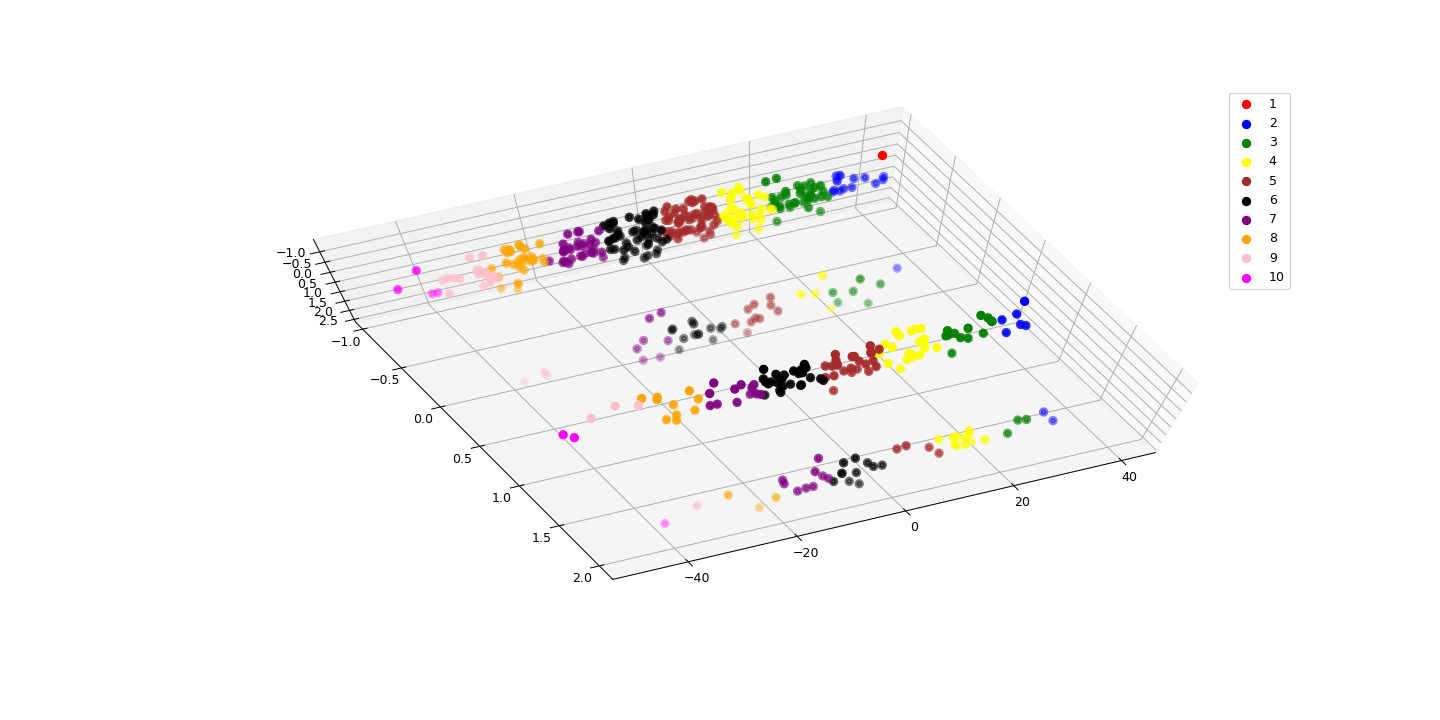

In [113]:
%matplotlib notebook

fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')


for key in classes:
    ax.scatter(classes[key]['component_1'],classes[key]['component_2'],classes[key]['component_3'], c=color_classes[key], linewidth=3)
    
ax.legend(['1','2','3','4','5','6','7','8','9','10'])
plt.show()